In [ ]:
import random as rd

Variant = 20
rd.seed(Variant)

count = rd.randint(500, 1000)

methods = ["Треды (clone)","Процессы (fork)" ]

list_actions = ["Среднее арифметическое значение (округленное до целого)","Медиана (округленная до целого)",
                "Количество чисел кратных пяти", "Третье после максимального", "Пятое после миниманого", "Количество простых",
               "Количество чисел, сумма цифр  которых кратна 3", "0.75 квантиль",
                "Наиболее часто встречающаяся цифра в случайных числах",
               "Наиболее редко встречающаяся цифра в случайных числах"]

[count, rd.sample(methods, 1), rd.sample(list_actions, 4)]



[963,
 ['Треды (clone)'],
 ['Пятое после миниманого',
  'Медиана (округленная до целого)',
  'Количество простых',
  'Наиболее редко встречающаяся цифра в случайных числах']]

# #1



```
format ELF64

include 'func.asm'

public _start

section '.bss' writable
    msg db "Введите команду", 0
    filename1 db "direct", 0
    filename2 db "reversed", 0
    argv rq 4
    input rb 100

section '.text' executable
_start:
    .loop:
        mov rsi, msg
        call print_str
        call new_line

        mov rsi, input
        call input_keyboard

        cmp byte[input], 'q'
        je .break

        mov rax, 57
        syscall
        cmp rax, 0
        jne .wait

        mov rax, 59
        mov rdi, input
        mov [argv], input
        mov [argv+8], filename1
        mov [argv+16], filename2
        mov [argv+24], 0
        mov rsi, argv  
        syscall
        call exit

        .wait:
        mov rax, 61
        mov rdi, -1
        mov rdx, 0
        mov r10, 0
        syscall
        jmp .loop


    .break:
    call exit


```



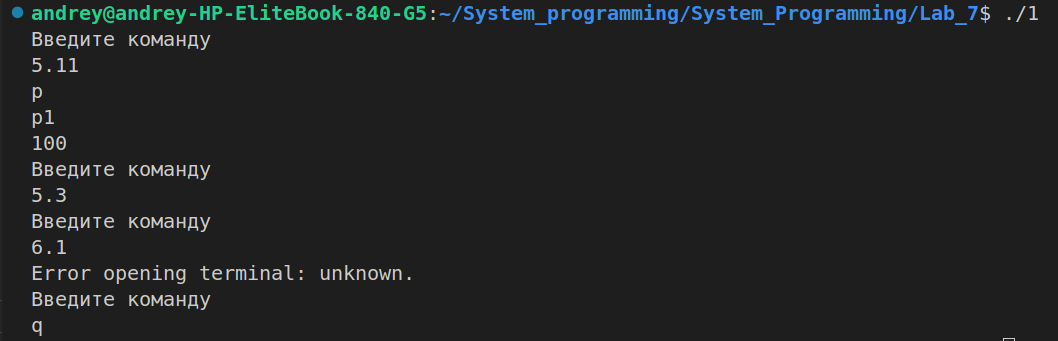

```
содержимое файла p:
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97

содержимое файла p1:
11
31
41
61
71

содержимое файла direct:
a
bb
ccc
dddd

содержимое файла reversed:
dddd
ccc
bb
a
```



# #2



```
format ELF64

include 'func.asm'

public _start

THREAD_FLAGS=2147585792
ARRLEN=963

section '.bss' writable
    array rb ARRLEN
    digits rq 10
    buffer rb 10
    f db "/dev/random", 0
    stack1 rq 4096
    msg1 db "Пятое число после минимального:", 0xA, 0
    msg2 db "Медиана:", 0xA, 0
    msg3 db "Простых чисел:", 0xA, 0
    msg4 db "Самая редкая цифра", 0xA, 0
    
section '.text' executable
_start:
    mov rax, 2
    mov rdi, f
    mov rsi, 0
    syscall
    mov r8, rax
    
    mov rax, 0
    mov rdi, r8
    mov rsi, array
    mov rdx, ARRLEN
    syscall

    .filter_loop:
        call filter
        cmp rax, 0
        jne .filter_loop
    
;mov rcx, ARRLEN
;.print:
;    dec rcx
;    xor rax, rax
;    mov al, [array+rcx]
;    mov rsi, buffer
;    call number_str
;    call print_str
;    call new_line
;    inc rcx
;loop .print

    mov rax, 56                 ; first child
    mov rdi, THREAD_FLAGS
    mov rsi, 4096
    add rsi, stack1
    syscall

    cmp rax, 0
    je .6th_min
    
    mov rax, 61
    mov rdi, -1
    mov rdx, 0
    mov r10, 0
    syscall

    call input_keyboard

    mov rax, 56                 ; second child
    mov rdi, THREAD_FLAGS
    mov rsi, 4096
    add rsi, stack1
    syscall

    cmp rax, 0
    je .median
    
    mov rax, 61
    mov rdi, -1
    mov rdx, 0
    mov r10, 0
    syscall

    call input_keyboard

    mov rax, 56                 ; third child
    mov rdi, THREAD_FLAGS
    mov rsi, 4096
    add rsi, stack1
    syscall

    cmp rax, 0
    je .primes
    
    mov rax, 61
    mov rdi, -1
    mov rdx, 0
    mov r10, 0
    syscall

    call input_keyboard

    mov rax, 56                 ; fourth child
    mov rdi, THREAD_FLAGS
    mov rsi, 4096
    add rsi, stack1
    syscall

    cmp rax, 0
    je .rare_digit
    
    mov rax, 61
    mov rdi, -1
    mov rdx, 0
    mov r10, 0
    syscall

    call exit
    call exit


    .6th_min:
        mov rsi, msg1
        call print_str

        xor rax, rax
        mov al, [array+5]
        mov rsi, buffer
        call number_str
        call print_str
        call new_line
        call exit
        call exit

    .median:
        mov rsi, msg2
        call print_str

        mov rax, ARRLEN
        mov rbx, 2
        div rbx
        mov bl, [array+rax]
        mov rax, rbx
        mov rsi, buffer
        call number_str
        call print_str
        call new_line
        call exit
        call exit

    .primes:
        mov rsi, msg3
        call print_str

        xor r8, r8 ; prime counter
        mov rsi, array ; iter
        add rsi, ARRLEN ; arr end
        dec rsi
        xor rbx, rbx
        .count:
            cmp rsi, array
            jl .next
            mov bl, [rsi]

            cmp bl, 1
            je .not_prime

            mov rcx, 2
            .prime_check:
                cmp rcx, rbx
                je .is_prime
                mov rax, rbx
                xor rdx, rdx
                div rcx
                cmp rdx, 0
                je .not_prime
                inc rcx
                jmp .prime_check
            
            .is_prime:
            inc r8

            .not_prime:
            dec rsi
            jmp .count
        
        .next:
        mov rax, r8
        mov rsi, buffer
        call number_str
        call print_str
        call new_line
        call exit
        call exit

    .rare_digit:
        mov rsi, msg4
        call print_str

        mov rsi, array ; iter
        add rsi, ARRLEN ; arr end
        dec rsi
        xor rbx, rbx
        mov rbx, 10
        .loop666:
            cmp rsi, array
            jl .next666

            xor rax, rax
            mov al, byte[rsi]
            .decomp_loop:
                xor rdx, rdx
                div rbx
                push rax
                mov rax, 8
                mul rdx
                mov rdx, rax
                pop rax
                mov r10, [digits+rdx]
                inc r10
                mov [digits+rdx], r10
                cmp rax, 0
                je @f
                jmp .decomp_loop
            
            @@:
            dec rsi
            jmp .loop666

        .next666:
        mov rax, 9999999 ; min count
        xor rbx, rbx ; digit
        xor rcx, rcx
        .comp_loop:
            cmp rcx, 10
            je .next777

            push rax
            mov rax, 8
            mul rcx
            mov rdx, rax
            pop rax

            cmp rax, [digits+rdx]
            jl @f
            mov rax, [digits+rdx]
            mov rbx, rcx

            @@:
            inc rcx
            jmp .comp_loop
        
        .next777:
        mov rax, rbx
        mov rsi, buffer
        call number_str
        call print_str
        call new_line
        call exit
        call exit


;output rax = 0 if filtered
filter:
    xor rax, rax ; swap counter
    mov rsi, array ; iter
    mov rcx, ARRLEN
    dec rcx
    .check:
        mov dl, [rsi]
        mov dh, [rsi+1]
        cmp dl, dh
        jbe .ok

        mov [rsi], dh
        mov [rsi+1], dl
        inc rax

        .ok:
        inc rsi
    loop .check
    ret

```



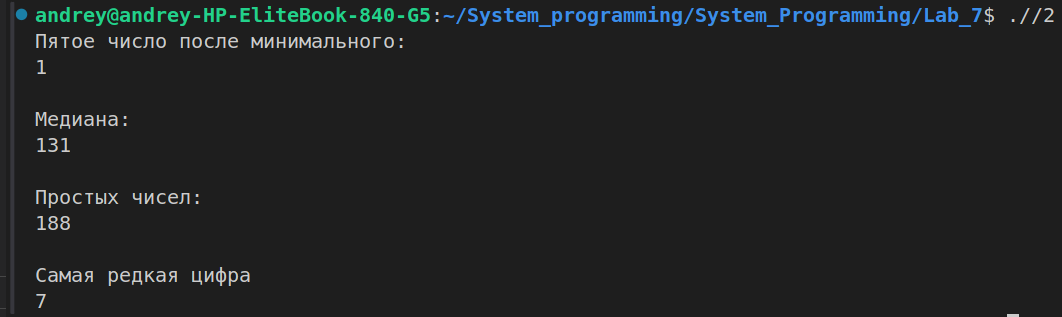